In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
segments_df = pd.read_csv("../../data/Raw-GPS-data-Kandy-Buses/MAIN/OUTPUTS/_merged_segements.csv")

In [20]:
segments_df = segments_df.dropna()

In [21]:
segments_df[segments_df.isnull().any(axis=1)]

,segment_starting_time,segment_ending_time,trip_id,deviceid,date,start_terminal,end_terminal,direction,day_of_week,hour_of_day,...,elevation_n,ele_X_speed_acc_p,ele_X_speed_acc_n,average_acceleration,average_deacceleration,std_acc_dacc,stop_count,average_speed,max_speed,speed_variation


In [43]:
selected_features = ['std_acc_dacc', 'speed_variation']
features = segments_df[selected_features]
features = features.values

In [37]:
# normalize the values
scaler = StandardScaler()

features = scaler.fit_transform(features)

In [40]:
# # Generate synthetic data
# X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Fit Gaussian Mixture Model
n_components = 4  # Number of clusters/components
gmm = GaussianMixture(n_components=n_components)
gmm.fit(features)

# Predict cluster labels
labels = gmm.predict(features)

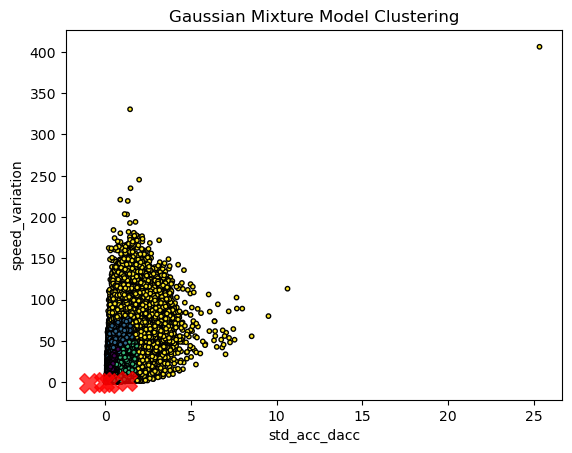

In [44]:
# Plot the results
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=40, edgecolors='k', marker='.')

# Plot the means of the Gaussian components
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.show()